In [17]:
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from cartopy.util import add_cyclic_point

In [2]:
# file = nc.Dataset('sst.mnmean.v4.nc')

file = xr.open_dataset('pr_Amon_CESM1-CAM5_amip_r1i1p1_197901-200512.nc')
# sresa1b_ncar_ccsm3-example.nc sst.mnmean.v4.nc

In [3]:
file

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 192, lon: 288, time: 324)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes:
    institution:                  NSF/DOE NCAR (National Center for Atmospher...
    institute_id:                 NSF-DOE-NCAR
    experiment_id:                amip
    source:                       CESM1-CAM5
    model_id:                     CESM1-CAM5
    forcing:                      Sl GHG Vl SS Ds SA BC MD OC Oz AA
    parent_experiment_id:         historical
    parent_experiment_rip:        r2i1p1
    branch_time:                  19.0


In [4]:
# file

lat = file['lat'][:]
lon = file['lon'][:]
sst = file['pr'][:,:,:]

In [18]:
csst, clon = add_cyclic_point(sst.values, coord=lon, axis=2)

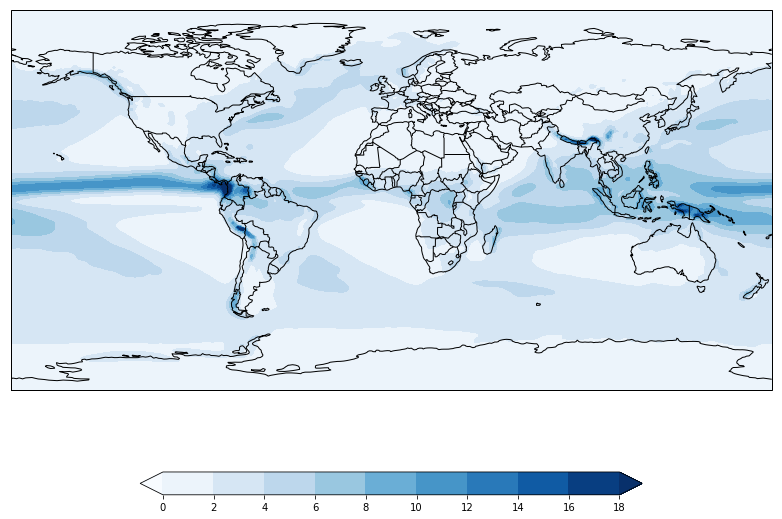

In [20]:
fig = plt.figure(figsize=(15,10))

#interval = np.arange(0,5.25,0.25)

ax = fig.add_subplot(111)

ax = plt.axes(projection=ccrs.PlateCarree())

# ax.contourf(lon, lat, sst, 60,
#              transform=ccrs.PlateCarree(), cmap = plt.get_cmap('Accent'),extend='max')

contour = ax.contourf(clon, lat, np.mean(csst*24*60*60,axis=0), levels = np.arange(0,20,2) ,
              transform=ccrs.PlateCarree(),cmap = plt.get_cmap('Blues'), extend='both')
fig.colorbar(contour, shrink = 0.6, orientation = 'horizontal')

# ax.coastlines()

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, 
# CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, 
# OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r,
# Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd,
# PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r,
# RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral,
# Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr,
# YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone,
# bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
# copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray,
# gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, 
# gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, 
# gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, 
# nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
# seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, 
# tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r